In [3]:
#Logistic regression
# 1. Predictive models are built by this using supervised learning
# 2. The target variable y is binary --> true/ false, 1/0, yes/no etc. i.e. prediction done is in binary form

# Why it is called regression? Because the prediction is in probabilities. Probability of y ranges from 0-1 (eg. 0.2,0.33 etc.)

# NOTE*** Although its a regression tech, we can use it for binary classification also

In [2]:
import pandas as pd
import numpy as np

In [3]:
cr = pd.read_csv(r"C:\Users\Siddharth Tripathi\Documents\Patient_with_abnormal_bloodpressure.csv")

In [4]:
cr.shape


(2000, 15)

In [5]:
cr.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [6]:
cr.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


In [7]:
#steps in model building -- 

#1. Understanding the problem statement
#2. Based on problem, do data mining. In real life we have to mine data unlike here we are reading external file
#3 data preperation/ data cleaning -- replacing or removing null values, converting non-numerical values to numerical etc.
#4 do the sampling -- this step should always be performed after 3rd step otherwise you have to perfrom 3rd step for both
#training and test data seperately.
#5 build the model / training
#6 test model on test data
#7 Check the model for business suitablity.

In [8]:
cr.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [11]:
#now here we see pregnancy has most number of null values. Lets fill it with 0, why 0 because it has only two values 1 meaning 
# pregnancy true 0 meaning pregnancy is false.

cr.Pregnancy = cr.Pregnancy.fillna(0)

In [12]:
cr.isnull().sum()

Patient_Number                     0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient      92
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day      242
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64

In [13]:
#similarly for filling null values of continuous data like genetic perdigree we can fill it with mean of that column.
#continuous data means which does not have fixed two values like in case of pregnancy or sex

cr.Genetic_Pedigree_Coefficient = cr.Genetic_Pedigree_Coefficient.fillna(cr.Genetic_Pedigree_Coefficient.mean())
cr.alcohol_consumption_per_day = cr.alcohol_consumption_per_day.fillna(cr.alcohol_consumption_per_day.mean())

In [14]:
#*********----------IMPORTANT ----------************

#Fortunately, we do not have any non-numerical value in our dataset. If however their would have been a value like that 
#say for example sex column had value male and female then we would have to replace it like this

# cr.sex = cr.sex.replace({"male":1,"female":0}) or cr.sex.replace({"male":1,"female":0}, inplace=True)

# cr.sex = cr.sex.astype("category") --to make it categorical data

In [15]:
cr.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [16]:
#setting our target column or variable
#cr.iloc[1:5,2:4] the first pair 1:5 -- from row one to row 4 and second pair 2:4 from column 2 to column 3. 

cr_y = cr.iloc[ : , 1]

In [17]:
cr_y.head()

0    1
1    0
2    1
3    0
4    1
Name: Blood_Pressure_Abnormality, dtype: int64

In [18]:
#setting our independent feature columns or variables
cr_x = cr.iloc[ : , 2:15]

In [19]:
cr_x.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [20]:
#making model for the same.

#train_test_split splits data into training and testing data 
from sklearn.model_selection import train_test_split

In [21]:
#no as u can see --
# cr_x_train and cr_x_test contains data from cr_x and similarly for cr_y meaning for both target variable and independent feature
#data is divided.
#test_size =.2 means our testing data in both x and y will be 20% of total data. Meaning 80% data used as training
#random state is defined because if it is not give, re-iteration might cause some test data to go in train data because every
#time we run this model, data is splitted randomly. So random state is just to avoid it.

cr_x_train,cr_x_test,cr_y_train,cr_y_test = train_test_split(cr_x , cr_y , test_size=.2 , random_state=101)

In [22]:
#lets check our split now

cr_x_train.shape

(1600, 13)

In [23]:
cr_y_train.shape

(1600,)

In [24]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
#Creating instance of Logistic Regression class

logmodel = LogisticRegression()

In [26]:
#building model or training model we use .fit(training features, training targets)

logmodel.fit(cr_x_train,cr_y_train)

C:\Users\Siddharth Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
#now lets predict on test data for y values. we use .predict(test features)

pred = logmodel.predict(cr_x_test)

In [28]:
#this will give output in the form of 0 and 1, 0 being blood pressure normal and 1 being blood pressure abnormal
pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [29]:
#We can also build confusion matrix for the same
from sklearn.metrics import confusion_matrix

#To create confusion matrix we can use confusion_matrix(predicted target values by our model, actual target values in test data)

tab_cr = confusion_matrix(pred, cr_y_test)

In [30]:
tab_cr

array([[144,  57],
       [ 56, 143]], dtype=int64)

In [31]:
#we can also calculate the probabilistic output for our target variable

pred_prob = logmodel.predict_proba(cr_x_test)
pred_prob

#in the output u can see, first element 0.691922 is probabilty of patient to fall in 0 that is no abnormal blood pressure
#so automatically, 0.308 is probabilty of the same patient to fall in 1 that is blood_pressure abnormal

array([[0.691922  , 0.308078  ],
       [0.84596437, 0.15403563],
       [0.09762828, 0.90237172],
       [0.16076334, 0.83923666],
       [0.08323592, 0.91676408],
       [0.47714292, 0.52285708],
       [0.76754912, 0.23245088],
       [0.41694439, 0.58305561],
       [0.87519273, 0.12480727],
       [0.7718566 , 0.2281434 ],
       [0.07941367, 0.92058633],
       [0.78920282, 0.21079718],
       [0.63765882, 0.36234118],
       [0.78036114, 0.21963886],
       [0.13426483, 0.86573517],
       [0.67659262, 0.32340738],
       [0.27016542, 0.72983458],
       [0.25382507, 0.74617493],
       [0.47546352, 0.52453648],
       [0.17933469, 0.82066531],
       [0.39946855, 0.60053145],
       [0.71428225, 0.28571775],
       [0.83673674, 0.16326326],
       [0.50732973, 0.49267027],
       [0.42650383, 0.57349617],
       [0.79624216, 0.20375784],
       [0.52902824, 0.47097176],
       [0.35112803, 0.64887197],
       [0.39142245, 0.60857755],
       [0.51679004, 0.48320996],
       [0.

In [32]:
##Calculating the precesion using confustion matrix -- (sum of diagnols of confusion matrix/sum of all elements)*100
tab_cr.diagonal().sum()/tab_cr.sum()*100

#the output comes out to be 71.75%

71.75

In [33]:
from sklearn.metrics import classification_report

print(classification_report(pred, cr_y_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       201
           1       0.71      0.72      0.72       199

   micro avg       0.72      0.72      0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



In [34]:
#Another method of measuring performance of model

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
log_roc_auc = roc_auc_score(cr_y_test,pred)

In [36]:
log_roc_auc

0.7174999999999999

In [37]:
pred_prob = logmodel.predict_proba(cr_x_test)

In [38]:
pred_prob

array([[0.691922  , 0.308078  ],
       [0.84596437, 0.15403563],
       [0.09762828, 0.90237172],
       [0.16076334, 0.83923666],
       [0.08323592, 0.91676408],
       [0.47714292, 0.52285708],
       [0.76754912, 0.23245088],
       [0.41694439, 0.58305561],
       [0.87519273, 0.12480727],
       [0.7718566 , 0.2281434 ],
       [0.07941367, 0.92058633],
       [0.78920282, 0.21079718],
       [0.63765882, 0.36234118],
       [0.78036114, 0.21963886],
       [0.13426483, 0.86573517],
       [0.67659262, 0.32340738],
       [0.27016542, 0.72983458],
       [0.25382507, 0.74617493],
       [0.47546352, 0.52453648],
       [0.17933469, 0.82066531],
       [0.39946855, 0.60053145],
       [0.71428225, 0.28571775],
       [0.83673674, 0.16326326],
       [0.50732973, 0.49267027],
       [0.42650383, 0.57349617],
       [0.79624216, 0.20375784],
       [0.52902824, 0.47097176],
       [0.35112803, 0.64887197],
       [0.39142245, 0.60857755],
       [0.51679004, 0.48320996],
       [0.

In [39]:
#convert pred_prob into data frame as we need the second column for ROC curve. Knowing the value of second column, the 
#probability for not falling in category 1 can be calculated automatically.

pred_prob_df = pd.DataFrame(pred_prob)
pred_prob_df.head()

,0,1
0,0.691922,0.308078
1,0.845964,0.154036
2,0.097628,0.902372
3,0.160763,0.839237
4,0.083236,0.916764


In [40]:
#Now calculate the False positive rate(FP/(TN+FP)) and True positive rate (TP/FP+TP)

fpr, tpr, threshold = roc_curve(cr_y_test,pred_prob_df.iloc[:,1])

In [41]:
fpr

array([0.   , 0.   , 0.   , 0.005, 0.005, 0.01 , 0.01 , 0.015, 0.015,
       0.02 , 0.02 , 0.025, 0.025, 0.03 , 0.03 , 0.035, 0.035, 0.04 ,
       0.04 , 0.045, 0.045, 0.05 , 0.05 , 0.055, 0.055, 0.065, 0.065,
       0.075, 0.075, 0.08 , 0.08 , 0.085, 0.085, 0.09 , 0.09 , 0.1  ,
       0.1  , 0.105, 0.105, 0.11 , 0.11 , 0.115, 0.115, 0.13 , 0.13 ,
       0.135, 0.135, 0.14 , 0.14 , 0.155, 0.155, 0.16 , 0.16 , 0.18 ,
       0.18 , 0.195, 0.195, 0.205, 0.205, 0.21 , 0.21 , 0.215, 0.215,
       0.23 , 0.23 , 0.24 , 0.24 , 0.245, 0.245, 0.27 , 0.27 , 0.275,
       0.275, 0.28 , 0.28 , 0.29 , 0.29 , 0.3  , 0.3  , 0.315, 0.315,
       0.32 , 0.32 , 0.325, 0.325, 0.33 , 0.33 , 0.335, 0.335, 0.345,
       0.345, 0.35 , 0.35 , 0.355, 0.355, 0.36 , 0.36 , 0.385, 0.385,
       0.39 , 0.39 , 0.4  , 0.4  , 0.405, 0.405, 0.41 , 0.41 , 0.415,
       0.415, 0.42 , 0.42 , 0.425, 0.425, 0.44 , 0.44 , 0.445, 0.445,
       0.48 , 0.48 , 0.495, 0.495, 0.575, 0.575, 0.62 , 0.62 , 0.625,
       0.625, 0.665,

In [42]:
tpr

array([0.   , 0.005, 0.08 , 0.08 , 0.12 , 0.12 , 0.165, 0.165, 0.185,
       0.185, 0.215, 0.215, 0.235, 0.235, 0.245, 0.245, 0.26 , 0.26 ,
       0.28 , 0.28 , 0.295, 0.295, 0.315, 0.315, 0.355, 0.355, 0.37 ,
       0.37 , 0.4  , 0.4  , 0.425, 0.425, 0.44 , 0.44 , 0.445, 0.445,
       0.46 , 0.46 , 0.47 , 0.47 , 0.49 , 0.49 , 0.515, 0.515, 0.52 ,
       0.52 , 0.535, 0.535, 0.55 , 0.55 , 0.555, 0.555, 0.585, 0.585,
       0.59 , 0.59 , 0.6  , 0.6  , 0.62 , 0.62 , 0.625, 0.625, 0.645,
       0.645, 0.655, 0.655, 0.675, 0.675, 0.695, 0.695, 0.705, 0.705,
       0.71 , 0.71 , 0.715, 0.715, 0.72 , 0.72 , 0.725, 0.725, 0.73 ,
       0.73 , 0.735, 0.735, 0.74 , 0.74 , 0.745, 0.745, 0.75 , 0.75 ,
       0.755, 0.755, 0.76 , 0.76 , 0.765, 0.765, 0.78 , 0.78 , 0.795,
       0.795, 0.805, 0.805, 0.81 , 0.81 , 0.82 , 0.82 , 0.825, 0.825,
       0.84 , 0.84 , 0.875, 0.875, 0.895, 0.895, 0.9  , 0.9  , 0.905,
       0.905, 0.91 , 0.91 , 0.915, 0.915, 0.92 , 0.92 , 0.93 , 0.93 ,
       0.935, 0.935,

In [43]:
threshold

array([1.94378621, 0.94378621, 0.90211993, 0.90097745, 0.88831353,
       0.88775406, 0.87738153, 0.8753129 , 0.86654381, 0.86573517,
       0.85211577, 0.84669119, 0.83813004, 0.83772554, 0.83501069,
       0.82965903, 0.8252666 , 0.82234066, 0.81925851, 0.81851462,
       0.81582536, 0.81276243, 0.80166208, 0.79911693, 0.78202552,
       0.77946853, 0.77439074, 0.77151934, 0.75361572, 0.75315024,
       0.7353169 , 0.72983458, 0.71756916, 0.7137476 , 0.70684226,
       0.70635672, 0.6996511 , 0.69359208, 0.68445864, 0.67781797,
       0.67264447, 0.66413999, 0.66056588, 0.65554551, 0.65395811,
       0.65265106, 0.64228543, 0.64128347, 0.63754877, 0.62853778,
       0.62828836, 0.62696634, 0.60602408, 0.59280011, 0.58821084,
       0.58325428, 0.58060459, 0.57710514, 0.57064512, 0.57012674,
       0.56859965, 0.56841718, 0.55349305, 0.55035961, 0.54315439,
       0.53373199, 0.52453648, 0.52285708, 0.5140064 , 0.5064304 ,
       0.50515973, 0.50314808, 0.50280003, 0.50273454, 0.50216

In [44]:
#Now to plot the curve we have to do following

import matplotlib.pyplot as pt

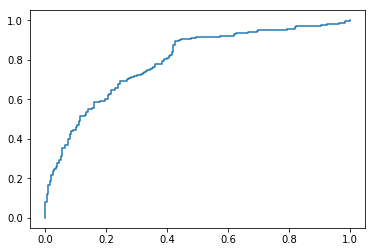

In [45]:
pt.plot(fpr,tpr)

Text(0.5, 1.0, 'AUROC curve')

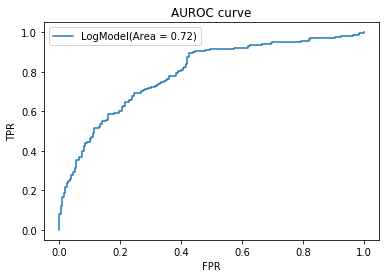

In [46]:
pt.plot(fpr,tpr,label="LogModel(Area = %.2f)" %log_roc_auc)
pt.xlabel("FPR")
pt.ylabel("TPR")
pt.legend(loc="upper left")
pt.title("AUROC curve")

In [47]:
#now if we want to create a practical implementation of this model, say in a healthcare app
#or hospital website. We can do the below steps. 
#1. First, calculated prediction values of all the data instead of dividing into test and
#train

logmodel.predict(cr_x)

#this will give output in classificaiton form such as 0 or 1

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
#probabilistic prediction will give probability of being blood pressure normal or abnormal for each patient. 

prob_on_full_data = logmodel.predict_proba(cr_x)
prob_on_full_data

array([[0.11473827, 0.88526173],
       [0.81128959, 0.18871041],
       [0.6821    , 0.3179    ],
       ...,
       [0.08718616, 0.91281384],
       [0.5518631 , 0.4481369 ],
       [0.47895046, 0.52104954]])

In [49]:
#from the above output, we can see probability of all the records whether they will fall in 0(first colmn) or 1
#If we want to derive information from this output, we can beautify it by adding a unique identification for each
#record such as id. In our dataset, that column is patient_number

prob_on_full_data = pd.DataFrame(prob_on_full_data)

#converted probabilty matrix into data frame

prob_on_full_data.head()

,0,1
0,0.114738,0.885262
1,0.811290,0.188710
2,0.682100,0.317900
3,0.627242,0.372758
4,0.841513,0.158487


In [50]:
type(prob_on_full_data)

pandas.core.frame.DataFrame

In [51]:
#need to convert it into pandas dataframe because we need to concat our unique
#identity column in it.Lets also rename our dataframe columns for better view

prob_on_full_data=prob_on_full_data.rename(columns={prob_on_full_data.columns[0]:"Prob_BP_Normal",prob_on_full_data.columns[1]:"Prob_BP_Abnormal"})

prob_on_full_data.head()

,Prob_BP_Normal,Prob_BP_Abnormal
0,0.114738,0.885262
1,0.811290,0.188710
2,0.682100,0.317900
3,0.627242,0.372758
4,0.841513,0.158487


In [52]:
cr.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [53]:
#Now lets add unique identity number column -- here Patient_number

prob_on_full_data = pd.concat([prob_on_full_data, pd.Series(cr.Patient_Number)],axis=1)

In [54]:
prob_on_full_data.head()

,Prob_BP_Normal,Prob_BP_Abnormal,Patient_Number
0,0.114738,0.885262,1
1,0.811290,0.188710,2
2,0.682100,0.317900,3
3,0.627242,0.372758,4
4,0.841513,0.158487,5


In [55]:
#Now as we sort the probabilities according to the unique identity number, we can tell by seeing that patient 412 has highest
#probability of falling into BP_abnormal condition. We can pull out all patients above 0.8 probability as high risk patients.
#lets see it in future rows. 


prob_on_full_data.sort_values(['Prob_BP_Abnormal'],ascending=False)

,Prob_BP_Normal,Prob_BP_Abnormal,Patient_Number
411,0.052641,0.947359,412
194,0.056214,0.943786,195
150,0.057993,0.942007,151
1551,0.058029,0.941971,1552
339,0.065974,0.934026,340
624,0.068604,0.931396,625
108,0.068923,0.931077,109
1199,0.069440,0.930560,1200
883,0.069772,0.930228,884
653,0.070569,0.929431,654


In [56]:
patients_with_high_risk = (prob_on_full_data.Prob_BP_Abnormal>0.80)

In [57]:
list_of_high_risk = prob_on_full_data[patients_with_high_risk]

In [58]:
list_of_high_risk.sort_values(['Prob_BP_Abnormal'],ascending=False).head(15)

#hence we can see from the output that 368 patients are their with hight risk and also find number of patietns.

,Prob_BP_Normal,Prob_BP_Abnormal,Patient_Number
411,0.052641,0.947359,412
194,0.056214,0.943786,195
150,0.057993,0.942007,151
1551,0.058029,0.941971,1552
339,0.065974,0.934026,340
624,0.068604,0.931396,625
108,0.068923,0.931077,109
1199,0.069440,0.930560,1200
883,0.069772,0.930228,884
653,0.070569,0.929431,654


In [66]:
#Now lets create a python program to implement our model
!pip install termcolor

In [68]:
# from termcolor import colored #this is to print different color output

def enter_input():
    global data_frame1
    Level_of_Hemoglobin = eval(input("Enter you Hemoglobin Level::"))
    Genetic_Pedigree_Coefficient = eval(input("Enter your Genetic Pedigree Coefficients"))
    Age = eval(input("Enter your Age"))
    BMI = eval(input("Enter you Bio Mass Index"))
    Sex = eval(input("Enter you sex, 0 being Male and 1 being female"))
    Pregnancy=eval(input("Enter 1 if Pregnant or enter 0"))
    Smoking=eval(input("Enter 1 if you smoke or enter 0"))
    Physical_activity=eval(input("Enter Physical activity calorie burnt/day"))
    salt_content_in_diet = eval(input("Enter salt content in micro-gram"))
    alchohol_consumption_per_day = eval(input("Enter alchohol consumption per day in ml"))
    Level_of_Stress = eval(input("Enter Level of Stress in 1-3, 1 being low 3 being high"))
    Chronic_kidney_disease=eval(input("Enter 1 if having chronic kidney disease or enter 0"))
    Adrenal_and_thyroid_disorders=eval(input("Enter 1 if having disorder or enter 0"))
    data_frame1 = pd.DataFrame({"Level_of_Hemoglobin":[Level_of_Hemoglobin],"Genetic_Pedigree_Coefficient":[Genetic_Pedigree_Coefficient],
                               "Age":[Age],"BMI":[BMI],"Sex":[Sex],"Pregnancy":[Pregnancy],"Smoking":[Smoking],"Physical_activity":[Physical_activity],
                                "salt_content_in_diet":[salt_content_in_diet],"alchohol_consumption_per_day":[alchohol_consumption_per_day],
                                "Level_of_Stress":[Level_of_Stress], "Chronic_kidney_disease":[Chronic_kidney_disease],
                                "Adrenal_and_thyroid_disorders":[Adrenal_and_thyroid_disorders]})
    
    global predict_value1
    predict_value1 = logmodel.predict(data_frame1)
    global probabilistic_value1
    probabilistic_value1 = logmodel.predict_proba(data_frame1)
#     print(colored("---------------------",'blue'))
#     print(colored("---------------------",'red'))
#     print(colored("---------------------",'yellow'))
    if predict_value1 == 0:
        print("----- Chances of Abnormal BP --Low Risk")
        print("--Probability of Having normal Bp",probabilistic_value1[0][0])
    else:
        print("-----Chances of Abnormal BP -- High Risk")
        print("--Probability of Having abnormal Bp",probabilistic_value1[0][1])
    
    
    